In [1]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.models import vit_b_16, vit_l_16
from torchvision.models import ViT_B_16_Weights
from src.model_managers.standard_model_manager import StandardModelManager

from src.dataset_loaders.fruits360 import Fruits360Loader
from tqdm import tqdm, tqdm_notebook



In [2]:
# Device Configuration:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

print(f"Device being used: {device}")

Device being used: cuda


In [4]:
### Loading Fruits360 dataset:

# Data Configuration & Hyperparameters:
PERC_KEEP = 0.25 # Proportion of data from datasets to keep
BATCH_SIZE = 128 # Batch size
EPOCHS = 10
LEARNING_RATE = 5e-4

fruits360_loader = Fruits360Loader(batch_size=BATCH_SIZE, perc_keep=PERC_KEEP)
train_360, val_360, test_360 = fruits360_loader.load_data()

print(f"Number of Batches in Training Set: {len(train_360)}")
print(f"Number of Batches in Validation Set: {len(val_360)}")
print(f"Number of Batches in Testing Set: {len(test_360)}")


111
28
47


In [5]:
# Loading vit_b_16 model with pre-trained weights on the ImageNet dataset:
vit_b = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)

# Number of classes of the Fruit360 dataset:
num_classes = 141

# Adjusting the last layer of the transformer to perform classification on the Fruits360 dataset:
vit_b.heads.head = nn.Linear(in_features=768, out_features=num_classes)

# Freezing the architecture:
for param in vit_b.parameters():
    param.requires_grad = False

# Unfreezing the architecture in the last layer to fine-tune model:
for param in vit_b.heads.head.parameters():
    param.requires_grad = True

# Model Training Configuration:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(vit_b.parameters(), lr=LEARNING_RATE)

# Wrapping the model in the StandardModelManager:
vit_b_wrapper = StandardModelManager(model=vit_b, criterion=criterion, optimizer=optimizer, device=device)


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epoch 1 Batch Training Accuracy: 0.0234
Epoch 1 Batch Training Accuracy: 0.2422
Epoch 1 Batch Training Accuracy: 0.3984
Epoch 1 Batch Training Accuracy: 0.6484
Epoch 1 Batch Training Accuracy: 0.7734
Epoch 1 Batch Training Accuracy: 0.7734
Epoch 1 Batch Training Accuracy: 0.8672
Epoch 1 Batch Training Accuracy: 0.9141
Epoch 1 Batch Training Accuracy: 0.8281
Epoch 1 Batch Training Accuracy: 0.9375
Epoch 1 Batch Training Accuracy: 0.9375
Epoch 1 Batch Training Accuracy: 1.0000


 10%|████████▏                                                                         | 1/10 [04:16<38:27, 256.40s/it]

Epoch 1 Batch Validation Accuracy: 0.9435
Epoch 2 Batch Training Accuracy: 0.9531
Epoch 2 Batch Training Accuracy: 0.9453
Epoch 2 Batch Training Accuracy: 0.9609
Epoch 2 Batch Training Accuracy: 0.9609
Epoch 2 Batch Training Accuracy: 0.9297
Epoch 2 Batch Training Accuracy: 0.9453
Epoch 2 Batch Training Accuracy: 1.0000
Epoch 2 Batch Training Accuracy: 0.9688
Epoch 2 Batch Training Accuracy: 0.9844
Epoch 2 Batch Training Accuracy: 0.9609
Epoch 2 Batch Training Accuracy: 0.9766
Epoch 2 Batch Training Accuracy: 1.0000


 20%|████████████████▍                                                                 | 2/10 [07:03<27:11, 203.92s/it]

Epoch 2 Batch Validation Accuracy: 0.9799
Epoch 3 Batch Training Accuracy: 1.0000
Epoch 3 Batch Training Accuracy: 0.9922
Epoch 3 Batch Training Accuracy: 0.9766
Epoch 3 Batch Training Accuracy: 0.9922
Epoch 3 Batch Training Accuracy: 0.9844
Epoch 3 Batch Training Accuracy: 0.9844
Epoch 3 Batch Training Accuracy: 0.9844
Epoch 3 Batch Training Accuracy: 0.9922
Epoch 3 Batch Training Accuracy: 1.0000
Epoch 3 Batch Training Accuracy: 0.9922
Epoch 3 Batch Training Accuracy: 0.9844
Epoch 3 Batch Training Accuracy: 1.0000


 30%|████████████████████████▌                                                         | 3/10 [09:52<21:53, 187.71s/it]

Epoch 3 Batch Validation Accuracy: 0.9898
Epoch 4 Batch Training Accuracy: 1.0000
Epoch 4 Batch Training Accuracy: 0.9922
Epoch 4 Batch Training Accuracy: 0.9922
Epoch 4 Batch Training Accuracy: 0.9766
Epoch 4 Batch Training Accuracy: 0.9922
Epoch 4 Batch Training Accuracy: 1.0000
Epoch 4 Batch Training Accuracy: 0.9922
Epoch 4 Batch Training Accuracy: 0.9922
Epoch 4 Batch Training Accuracy: 1.0000
Epoch 4 Batch Training Accuracy: 0.9844
Epoch 4 Batch Training Accuracy: 0.9922
Epoch 4 Batch Training Accuracy: 1.0000


 40%|████████████████████████████████▊                                                 | 4/10 [12:41<18:02, 180.48s/it]

Epoch 4 Batch Validation Accuracy: 0.9955
Epoch 5 Batch Training Accuracy: 1.0000
Epoch 5 Batch Training Accuracy: 0.9922
Epoch 5 Batch Training Accuracy: 1.0000
Epoch 5 Batch Training Accuracy: 0.9922
Epoch 5 Batch Training Accuracy: 1.0000
Epoch 5 Batch Training Accuracy: 0.9922
Epoch 5 Batch Training Accuracy: 1.0000
Epoch 5 Batch Training Accuracy: 0.9844
Epoch 5 Batch Training Accuracy: 1.0000
Epoch 5 Batch Training Accuracy: 1.0000
Epoch 5 Batch Training Accuracy: 1.0000
Epoch 5 Batch Training Accuracy: 1.0000


 50%|█████████████████████████████████████████                                         | 5/10 [15:28<14:38, 175.66s/it]

Epoch 5 Batch Validation Accuracy: 0.9966
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 0.9844
Epoch 6 Batch Training Accuracy: 1.0000
Epoch 6 Batch Training Accuracy: 1.0000


 60%|█████████████████████████████████████████████████▏                                | 6/10 [18:14<11:29, 172.31s/it]

Epoch 6 Batch Validation Accuracy: 0.9980
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 0.9922
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000
Epoch 7 Batch Training Accuracy: 1.0000


 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [21:00<08:30, 170.31s/it]

Epoch 7 Batch Validation Accuracy: 0.9986
Epoch 8 Batch Training Accuracy: 1.0000
Epoch 8 Batch Training Accuracy: 1.0000
Epoch 8 Batch Training Accuracy: 0.9922
Epoch 8 Batch Training Accuracy: 0.9922
Epoch 8 Batch Training Accuracy: 0.9922
Epoch 8 Batch Training Accuracy: 1.0000
Epoch 8 Batch Training Accuracy: 0.9922
Epoch 8 Batch Training Accuracy: 1.0000
Epoch 8 Batch Training Accuracy: 1.0000
Epoch 8 Batch Training Accuracy: 1.0000
Epoch 8 Batch Training Accuracy: 1.0000
Epoch 8 Batch Training Accuracy: 1.0000


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [23:46<05:38, 169.03s/it]

Epoch 8 Batch Validation Accuracy: 0.9989
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000
Epoch 9 Batch Training Accuracy: 1.0000


 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [26:33<02:48, 168.41s/it]

Epoch 9 Batch Validation Accuracy: 0.9989
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000
Epoch 10 Batch Training Accuracy: 1.0000


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [29:20<00:00, 176.09s/it]

Epoch 10 Batch Validation Accuracy: 0.9994


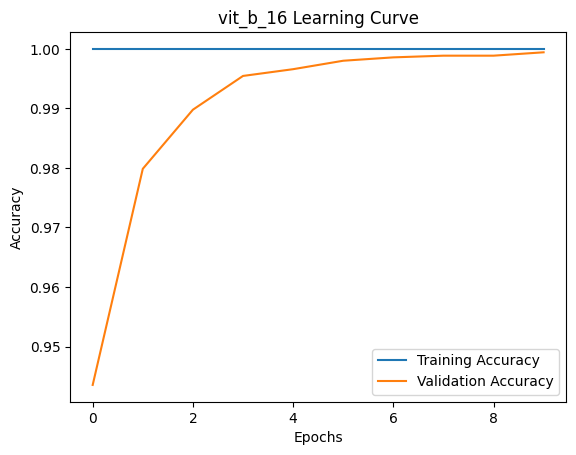

Test Accuracy: 0.9802


tensor(0.9802, device='cuda:0')

In [6]:
# Training the model:
vit_b_wrapper.train(training_data_loader=train_360, validation_data_loader=val_360, epochs=EPOCHS)

# Creating, saving, and displaying learning curve from training:
vit_b_wrapper.plot_learning_curve("vit_b_16")

# Testing the model:
vit_b_wrapper.test(test_360)